# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# !pip install splinter==0.18
# !pip install selenium==3.141.0
# !pip install webdriver-manager

In [2]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager

# Launch the browser
executable_path = {'executable_path': ChromeDriverManager().install()}
executable_path
browser = Browser(driver_name='chrome', retry_count=1, **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

# Scrape & Parse the website
html = browser.html
mars_data = soup(html, 'html.parser')

In [5]:
# Extract all rows of data

# Find the table
table = mars_data.find('table', class_='table')

# Store the table data (A list of lists)
data_lists = []

rows = table.find_all('tr')
# Get column headings
header_row = rows[0]
columns = header_row.find_all('th')
column_headings = [col.text.strip() for col in columns]


# Loop through rows (start from the second row, skipping header)
for row in rows[1:]:
    row_data = [cell.text.strip() for cell in row.find_all('td')]
    data_lists.append(row_data)

# Print the extracted data
print(column_headings)
for row_data in data_lists:
    print(row_data)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
# Loop through the scraped data to create a list of rows

# Done, in the preceding cell

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_atm_df = pd.DataFrame(data_lists, columns = column_headings)

In [8]:
# Confirm DataFrame was created successfully
mars_atm_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_atm_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis

mars_atm_df['terrestrial_date'] = pd.to_datetime(mars_atm_df['terrestrial_date'])
mars_atm_df['sol'] = mars_atm_df['sol'].astype('int64')
mars_atm_df['ls'] = mars_atm_df['ls'].astype('int64')
mars_atm_df['month'] = mars_atm_df['month'].astype('int64')
mars_atm_df['min_temp'] = mars_atm_df['min_temp'].astype('float64')
mars_atm_df['pressure'] = mars_atm_df['pressure'].astype('float64')


In [11]:
# Confirm type changes were successful by examining data types again
mars_atm_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
# martian_months = mars_atm_df['month'].value_counts().sort_index()
martian_months = mars_atm_df.groupby('month')['month'].value_counts().sort_index().droplevel(1)
martian_months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
len(mars_atm_df['sol'])

1867

In [14]:
# 3. What is the average low temperature by month?

avg_min_temp = mars_atm_df.groupby('month')['min_temp'].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

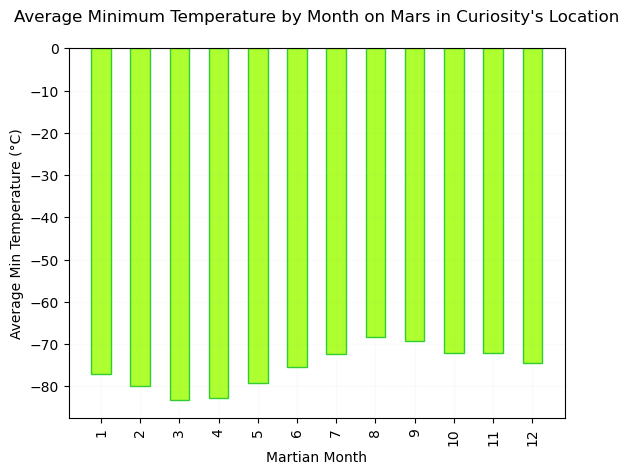

In [15]:
# Plot the average temperature by month
# Plot 1a
plt.bar(avg_min_temp.index, avg_min_temp.values, width=0.5, color = 'greenyellow', edgecolor = 'limegreen')

plt.xlabel('Martian Month')
plt.ylabel('Average Min Temperature (\u00b0C)')
plt.title("Average Minimum Temperature by Month on Mars in Curiosity's Location", y = 1.05)
plt.xticks(avg_min_temp.index, rotation=90)
plt.grid(True, alpha = 0.05)

plt.show()

#### Additional Plot

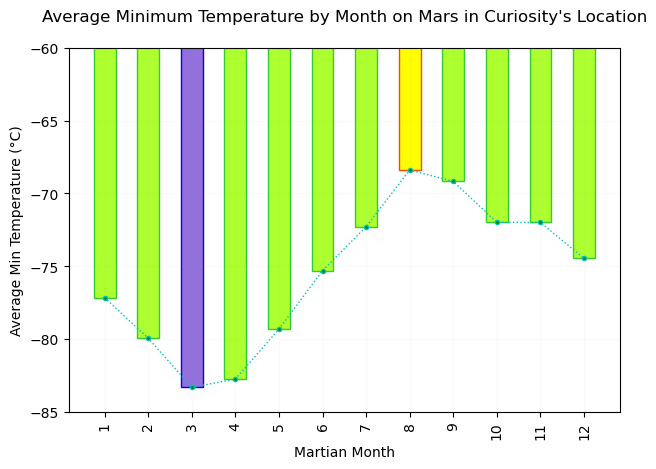

In [16]:
# Plot 1b
# Initialize all bars with the same color
colors = ['greenyellow'] * len(avg_min_temp)
edgecolors = ['limegreen'] * len(avg_min_temp)

# Set the 3rd and 8th bars to a different color
colors[2] = 'mediumpurple'
edgecolors[2] = 'blue'
colors[7] = 'yellow'
edgecolors[7] = 'orangered'

plt.bar(avg_min_temp.index, avg_min_temp.values, width=0.5, color = colors, edgecolor = edgecolors)
plt.plot(avg_min_temp.index, avg_min_temp.values, marker = 'o', markerfacecolor='g', markersize = 3, color = 'c', lw=1, linestyle='dotted')

plt.xlabel('Martian Month')
plt.ylabel('Average Min Temperature (\u00b0C)')
plt.ylim(-85, -60)
plt.title("Average Minimum Temperature by Month on Mars in Curiosity's Location", y = 1.05)
plt.xticks(avg_min_temp.index, rotation=90)
plt.grid(True, alpha = 0.05)

plt.tight_layout()
plt.show()

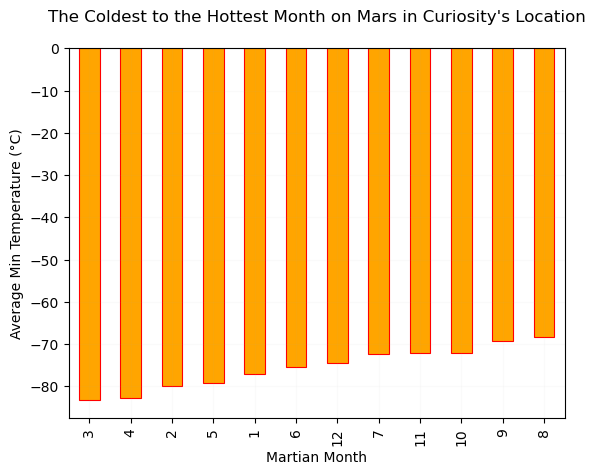

Month-3 is the coldest month, and month-8 is the wormest month on Mars at Curiosity's location


In [17]:
# Identify the coldest and hottest months in Curiosity's location

avg_low_temp = mars_atm_df.groupby('month')['min_temp'].mean()
month_temp_df = pd.DataFrame(dict(
                                  month=avg_low_temp.index,
                                  temp=avg_low_temp.values
                                  ))                              


# Sort the DataFrame by 'temp'
sorted_month_temp_df = month_temp_df.sort_values(by='temp')

# Plot only the 'temp' column
ax = sorted_month_temp_df['temp'].plot(kind='bar', color='orange', edgecolor='r', linewidth=0.8)
ax.set_xlabel('Martian Month')
ax.set_ylabel('Average Min Temperature (\u00b0C)')
ax.set_title("The Coldest to the Hottest Month on Mars in Curiosity's Location", y = 1.05)
ax.set_xticks(range(len(sorted_month_temp_df)))  
ax.set_xticklabels(sorted_month_temp_df['month'])
ax.grid(True, alpha=0.05)

plt.show()

print(f"Month-3 is the coldest month, and month-8 is the wormest month on Mars at Curiosity's location")

In [18]:
# 4. Average pressure by Martian month
avg_pressure = mars_atm_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

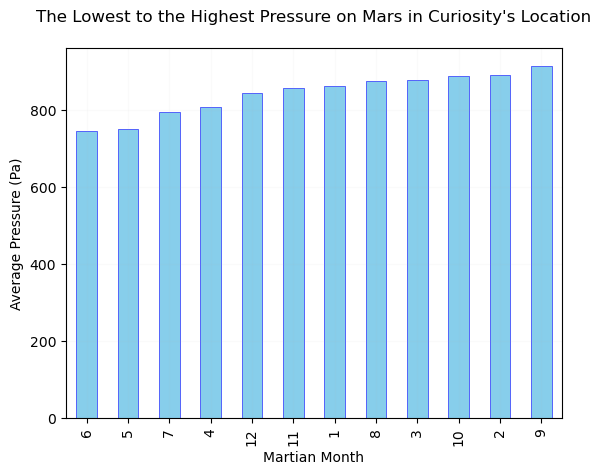

In [19]:
# Plot the average pressure by month

avg_pressure = mars_atm_df.groupby('month')['pressure'].mean()

month_prsr_df = pd.DataFrame(dict(
                                  month=avg_pressure.index,
                                  prsr=avg_pressure.values
                                  ))                              


# Sort the DataFrame by 'prsr'
sorted_month_prsr_df = month_prsr_df.sort_values(by='prsr')

# Plot only the 'prsr' column
ax = sorted_month_prsr_df['prsr'].plot(kind='bar', color='skyblue', edgecolor='blue', linewidth=0.4)
ax.set_xlabel('Martian Month')
ax.set_ylabel('Average Pressure (Pa)')
ax.set_title("The Lowest to the Highest Pressure on Mars in Curiosity's Location", y = 1.05)
ax.set_xticks(range(len(sorted_month_prsr_df)))  # Set custom x-axis ticks
ax.set_xticklabels(sorted_month_prsr_df['month'])
ax.grid(True, alpha=0.05)

plt.show()

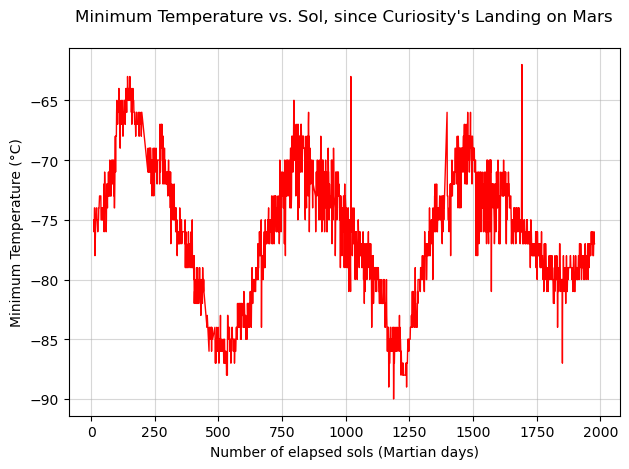

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# 5a. Plot the minimum temperature in a Martian day

plt.plot( mars_atm_df['sol'], mars_atm_df['min_temp'], marker = None, markerfacecolor='g', markersize = 3, color = 'r', lw=1)

plt.xlabel('Number of elapsed sols (Martian days)')
plt.ylabel('Minimum Temperature (\u00b0C)')
# plt.ylim(-85, -60)
plt.title("Minimum Temperature vs. Sol, since Curiosity's Landing on Mars", y = 1.05)
# plt.xticks(avg_min_temp.index, rotation=90)
plt.grid(True, alpha = 0.5)

plt.tight_layout()
plt.show()

In [21]:
# 5b. Martian Year

import numpy as np

sol_min = 10
sol_max = 1977
max_temp_sol = []
min_temp_sol = []

# Filtering out the specific rows to skip
mars_atm_filtered = mars_atm_df[
    ~((mars_atm_df['sol'] == 1020) & (mars_atm_df['min_temp'] == -63.0)) &
    ~((mars_atm_df['sol'] == 1692) & (mars_atm_df['min_temp'] == -62.0)) &
    ~((mars_atm_df['sol'] == 1188) & (mars_atm_df['min_temp'] == -90.0)) &
    ~((mars_atm_df['sol'] == 1169) & (mars_atm_df['min_temp'] == -89.0))      
]

for sol in mars_atm_filtered['sol']:
    if sol_min >= sol_max:
        break
    else:
        filtered_data = mars_atm_filtered[
            (mars_atm_filtered['sol'] > sol_min) & (mars_atm_filtered['sol'] <= (sol_min + 700))
        ]
        max_temp_row = filtered_data.loc[filtered_data['min_temp'].idxmax()]
        min_temp_row = filtered_data.loc[filtered_data['min_temp'].idxmin()]

        max_temp_sol_value = max_temp_row['sol']
        max_temp_sol.append(max_temp_sol_value)
        
        min_temp_sol_value = min_temp_row['sol']
        min_temp_sol.append(min_temp_sol_value)
        

    sol_min += 700

print(f"Crests of min_temp on 'sol'(Martian day): {max_temp_sol}")
print(f"Troughs of min_temp on 'sol'(Martian day): {min_temp_sol}")
print()

# function 'martian_year' takes the difference in 'sol' count
# between 2 consecutive 'sols' in the list, and returns the average of 
# number of 'sols' in a martian year
def martian_year(list):
    
    sol_diff = []
    for i in range(len(list) - 1, 0, -1):
        diff = (list[i] - list[i-1])
        sol_diff.append(diff)
    return int(sum(sol_diff) / len(sol_diff))   
    
print(f'Average number of terrestrial days in a Martian year: {martian_year(max_temp_sol)} (from crest-crest min_temp)')
print(f'Average number of terrestrial days in a Martian year: {martian_year(min_temp_sol)} (from trough-trough min_temp)')
print()


Crests of min_temp on 'sol'(Martian day): [143, 796, 1479]
Troughs of min_temp on 'sol'(Martian day): [532, 1239, 1851]

Average number of terrestrial days in a Martian year: 668 (from crest-crest min_temp)
Average number of terrestrial days in a Martian year: 659 (from trough-trough min_temp)



#### On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!


#### Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

#### The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
mars_atm_df.to_csv('mars_atm_df.csv', index = False)

In [23]:
browser.quit()